In [943]:
import numpy as np 
import pandas as pd 
from datetime import datetime

In [944]:
df = pd.read_csv("waypoints1-robot-dlo-odom_node-odom.csv")
df.head()

,time,PosX,PosY,OriantationX,OriantationY,OriantationZ,OriantationW
0,2022/08/16/12:40:09.957258,-0.002952,-0.000174,0.000700,-0.000224,-0.000038,1.0
1,2022/08/16/12:40:10.057131,0.003097,-0.000733,0.000504,-0.000260,0.000089,1.0
2,2022/08/16/12:40:10.157066,0.004766,-0.000700,0.000681,-0.000268,0.000069,1.0
3,2022/08/16/12:40:10.256724,0.000553,-0.000429,0.000578,-0.000245,0.000094,1.0
4,2022/08/16/12:40:10.356861,0.002144,-0.000451,0.000530,-0.000254,0.000072,1.0


In [945]:
df['time']= df['time'].apply(lambda x: datetime.strptime(x.strip(), '%Y/%m/%d/%H:%M:%S.%f'))
df['time']

0      2022-08-16 12:40:09.957258
1      2022-08-16 12:40:10.057131
2      2022-08-16 12:40:10.157066
3      2022-08-16 12:40:10.256724
4      2022-08-16 12:40:10.356861
                  ...            
1011   2022-08-16 12:41:51.064241
1012   2022-08-16 12:41:51.163516
1013   2022-08-16 12:41:51.263658
1014   2022-08-16 12:41:51.364442
1015   2022-08-16 12:41:51.463954
Name: time, Length: 1016, dtype: datetime64[ns]

In [946]:
df.head(5)

,time,PosX,PosY,OriantationX,OriantationY,OriantationZ,OriantationW
0,2022-08-16 12:40:09.957258,-0.002952,-0.000174,0.000700,-0.000224,-0.000038,1.0
1,2022-08-16 12:40:10.057131,0.003097,-0.000733,0.000504,-0.000260,0.000089,1.0
2,2022-08-16 12:40:10.157066,0.004766,-0.000700,0.000681,-0.000268,0.000069,1.0
3,2022-08-16 12:40:10.256724,0.000553,-0.000429,0.000578,-0.000245,0.000094,1.0
4,2022-08-16 12:40:10.356861,0.002144,-0.000451,0.000530,-0.000254,0.000072,1.0


In [947]:
import math 
import matplotlib.pyplot as plt
import datetime 

In [948]:
lastPx = 0 
lastPy = 0 
lastT = 0 
vMag = []
timeStamp = []
t = []
for idx , (currentT , currentPx, currentPy) in enumerate (zip(df.time ,df.PosX, df.PosY)):
    #if idx !=0:  
    currentT = currentT.timestamp() #- df.time[0].timestamp()
    # else:
        # currentT = 0 
    timeStamp.append((currentT)) # in mins
    t.append(currentT-timeStamp[0])
    dt = currentT-lastT
    # print(dt) 
    dx = currentPx - lastPx
    # print(dx)
    dy = currentPy - lastPy
    # print(dy)
    # try:
    currentVx = float(dx)/float(dt)
    # except:
        # print("division by Zero , 2lak ma henta ")
    currentVy = float(dy/dt) 
    
    vMag.append(math.sqrt(currentVx**2 + currentVy**2))
    lastT , lastPx  , lastPy  = currentT , currentPx  , currentPy 

df['Vmag'] = vMag
df['t'] = t
# print(t)

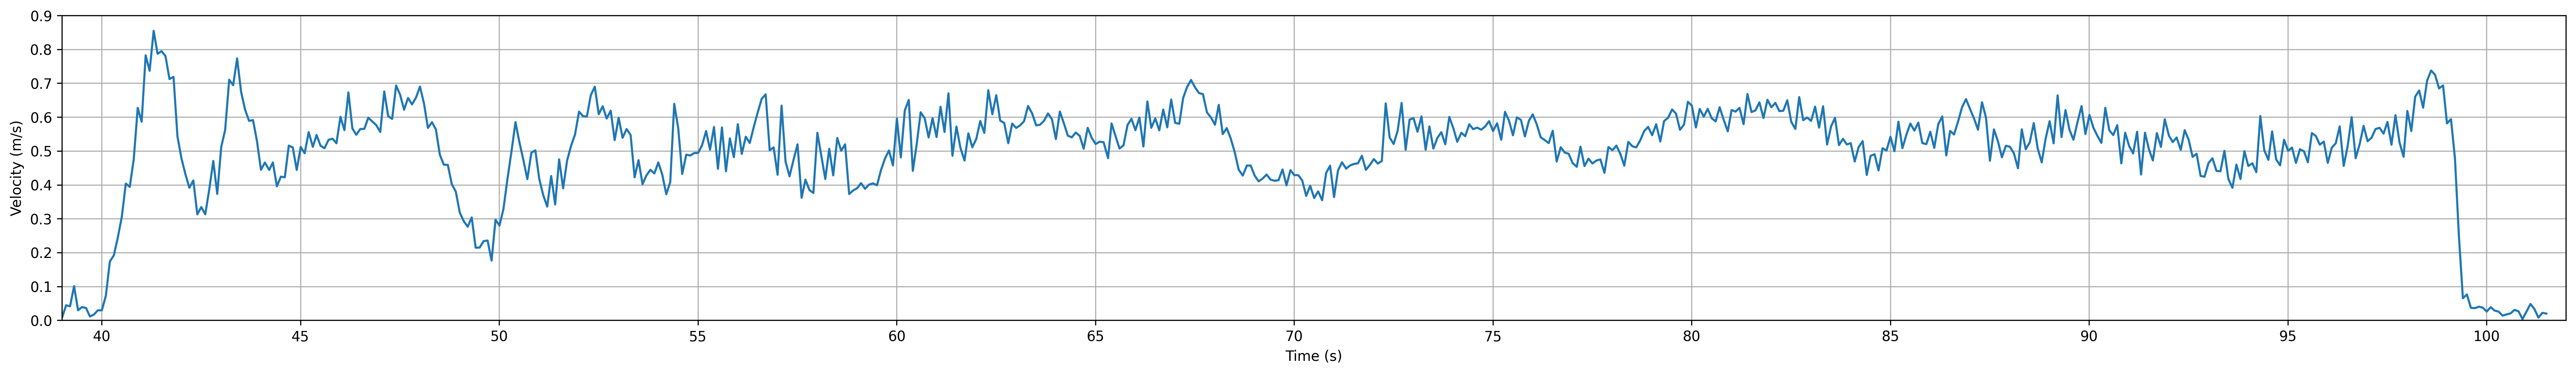

In [949]:
plt.figure(dpi=300, figsize=(32,4))
plt.grid()
plt.xlim(39,102)
plt.ylim(0,0.9)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.plot(t, vMag)

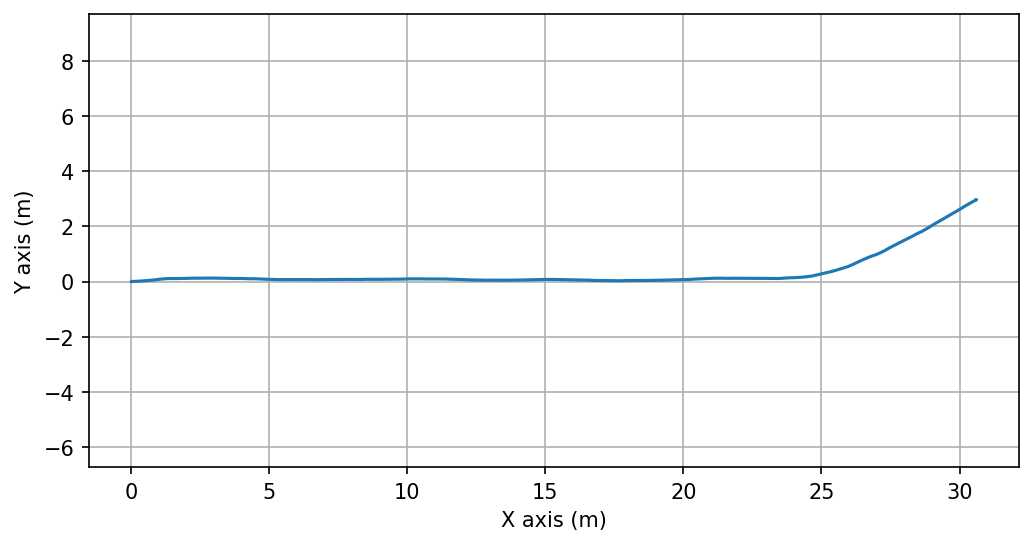

In [950]:
plt.figure(dpi=150, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(df.PosX , df.PosY)


In [951]:
df.head()

,time,PosX,PosY,OriantationX,OriantationY,OriantationZ,OriantationW,Vmag,t
0,2022-08-16 12:40:09.957258,-0.002952,-0.000174,0.000700,-0.000224,-0.000038,1.0,1.780631e-12,0.000000
1,2022-08-16 12:40:10.057131,0.003097,-0.000733,0.000504,-0.000260,0.000089,1.0,6.082328e-02,0.099873
2,2022-08-16 12:40:10.157066,0.004766,-0.000700,0.000681,-0.000268,0.000069,1.0,1.670555e-02,0.199808
3,2022-08-16 12:40:10.256724,0.000553,-0.000429,0.000578,-0.000245,0.000094,1.0,4.236152e-02,0.299466
4,2022-08-16 12:40:10.356861,0.002144,-0.000451,0.000530,-0.000254,0.000072,1.0,1.588659e-02,0.399603


In [952]:
carla_df = pd.DataFrame([df.PosX ,df.PosY , df.Vmag, df.t]).transpose()
carla_df.columns=['X','Y','V','Tway']
carla_df.Y = carla_df.Y * -1 
carla_df.head() 

,X,Y,V,Tway
0,-0.002952,0.000174,1.780631e-12,0.000000
1,0.003097,0.000733,6.082328e-02,0.099873
2,0.004766,0.000700,1.670555e-02,0.199808
3,0.000553,0.000429,4.236152e-02,0.299466
4,0.002144,0.000451,1.588659e-02,0.399603


In [953]:
carla_df.to_csv("racetrack_waypoints.txt", header=False,index=False)

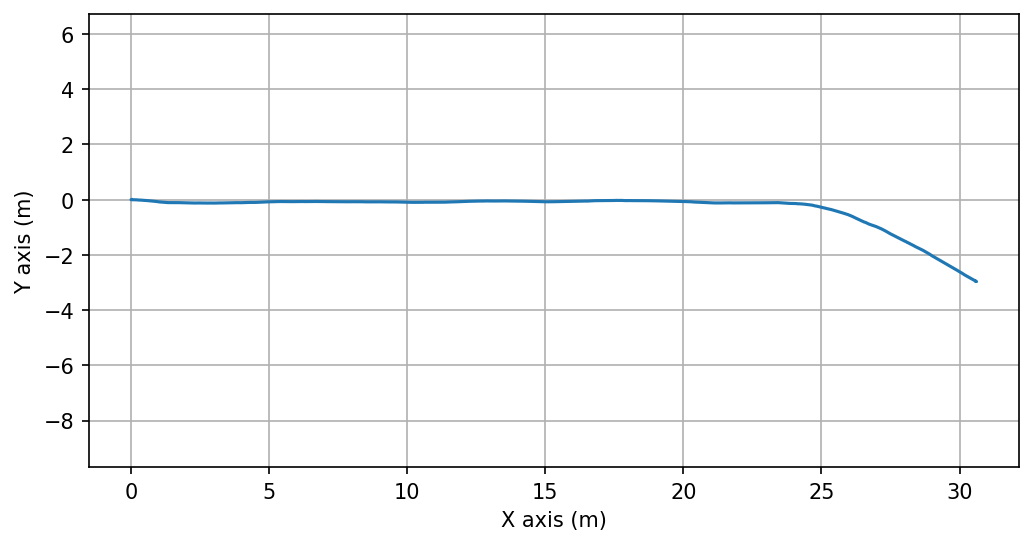

In [954]:
plt.figure(dpi=150, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(carla_df.X , carla_df.Y)

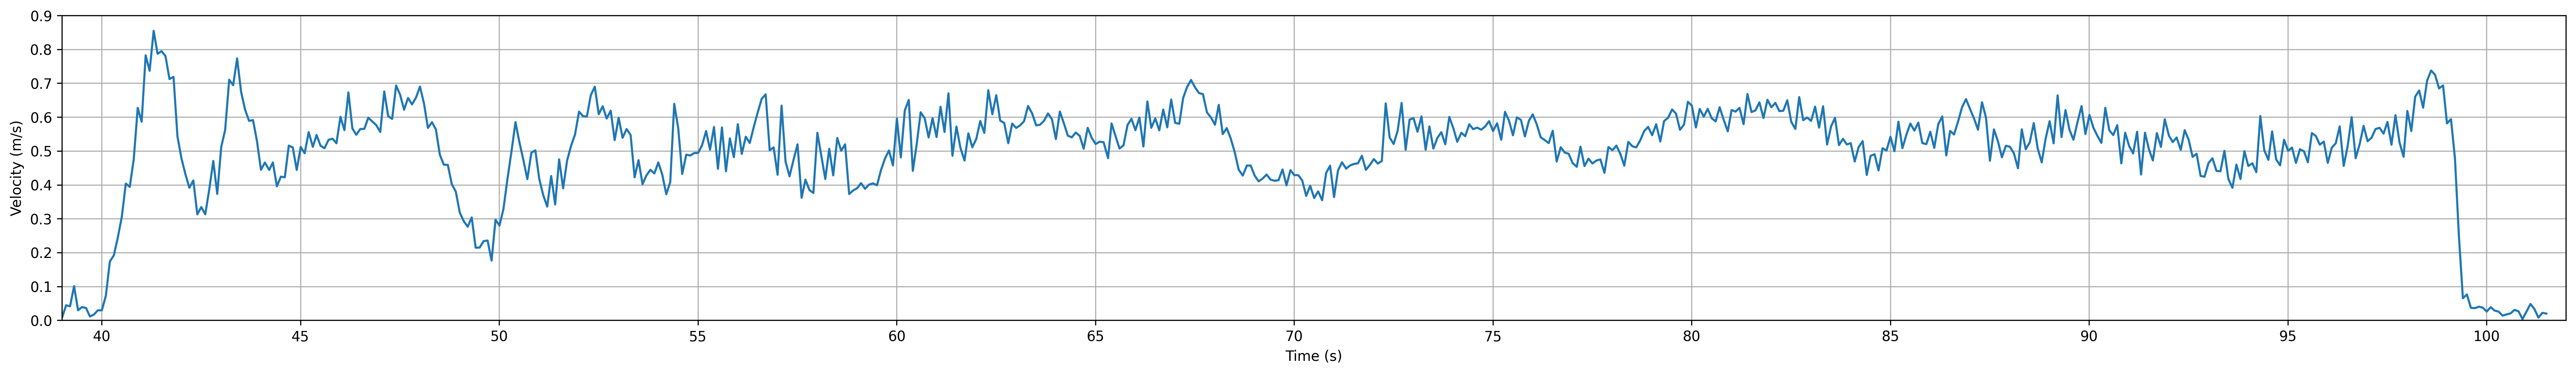

In [955]:
plt.figure(dpi=300, figsize=(32,4))
plt.grid()
plt.xlim(39,102)
plt.ylim(0,0.9)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.plot(t, carla_df.V)

In [956]:
carla_df_avgV = pd.DataFrame([df.PosX ,df.PosY,df.Vmag ]).transpose()
carla_df_avgV.columns=['X','Y','V']
carla_df_avgV.head() 

,X,Y,V
0,-0.002952,-0.000174,1.780631e-12
1,0.003097,-0.000733,6.082328e-02
2,0.004766,-0.000700,1.670555e-02
3,0.000553,-0.000429,4.236152e-02
4,0.002144,-0.000451,1.588659e-02


In [957]:
carla_df_avgV.V = carla_df.V.mean()
carla_df_avgV.head()

,X,Y,V
0,-0.002952,-0.000174,0.318219
1,0.003097,-0.000733,0.318219
2,0.004766,-0.000700,0.318219
3,0.000553,-0.000429,0.318219
4,0.002144,-0.000451,0.318219


In [958]:
# sample_df = carla_df_avgV[start:finish]
sample_df = carla_df[1:41]
# print(sample_df)
print(sample_df.shape)
def avg_calc(sample):
  return sample.mean()
  
x,y,v,t = avg_calc(sample= sample_df)
print(x,y,v,t)

(40, 4)
0.0008720998 0.00037225839999999996 0.028153758295544458 2.052214914560318


In [959]:
print(carla_df.shape)

(1016, 4)


In [960]:
carla_df.head()

,X,Y,V,Tway
0,-0.002952,0.000174,1.780631e-12,0.000000
1,0.003097,0.000733,6.082328e-02,0.099873
2,0.004766,0.000700,1.670555e-02,0.199808
3,0.000553,0.000429,4.236152e-02,0.299466
4,0.002144,0.000451,1.588659e-02,0.399603


#### Build waypoints

In [961]:
start = 398
increment = 10
finish = start + increment 
t_wp = []
x = []
y = []
v = []

x.append(carla_df.X[397])
y.append(carla_df.Y[397])
v.append(carla_df.V[397])
t_wp.append(0.0)
t_wp_0 = carla_df.Tway[397]

# print('    X\t\t      Y\t\t     V\t\t     T')
for i in range((carla_df.shape[0] - start)//increment):
    sample_df = carla_df[start:finish]
    xVal, yVal, vVal, tVal = avg_calc(sample= sample_df)
    x.append(xVal)
    y.append(yVal)
    v.append(vVal)
    t_wp.append(tVal-t_wp_0)
    
    # print(round(xVal,6),'\t',round(yVal,6),'\t',round(vVal,6),'\t',round(tVal-t_wp_0,6))

    start = finish
    finish += increment

# print((t_wp))
waypoints_df = pd.DataFrame()
waypoints_df['X'] = x
waypoints_df['Y'] = y
waypoints_df['V'] = v
waypoints_df['T'] = t_wp
# waypoints_df['V_avg'] = waypoints_df['V'].rolling(15).mean()
# waypoints_df.columns=['T','X','Y','V']
waypoints_df.shape

(62, 4)

In [962]:
# from math import nan

# for i in range(0,14):
#     waypoints_df['V_avg'][i] = waypoints_df['V_avg'][14]/13 * i
# waypoints_df['V_avg']

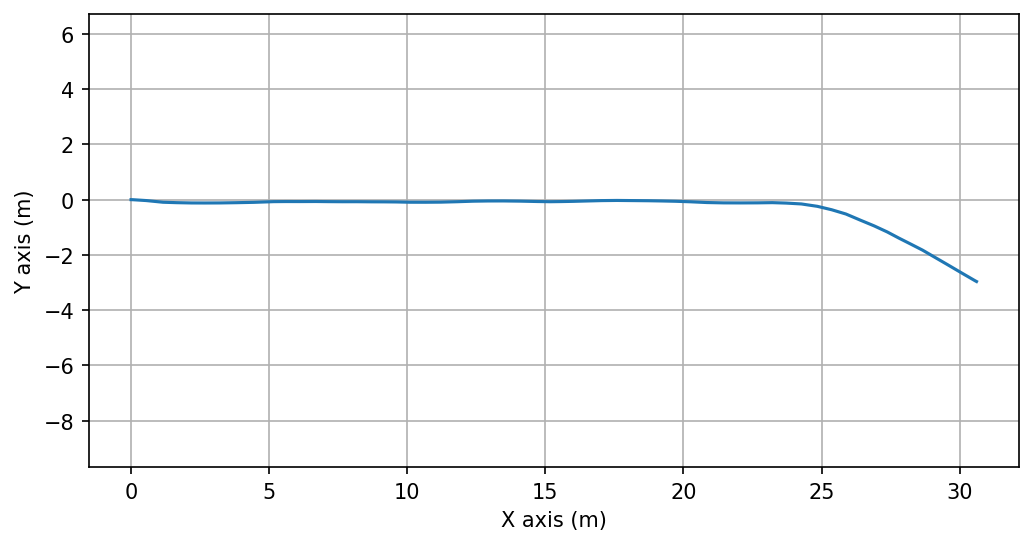

In [963]:
plt.figure(dpi=150, figsize=(8,4))
plt.grid()
plt.xlabel('X axis (m)')
plt.ylabel('Y axis (m)')
plt.axis('equal')
plt.plot(waypoints_df.X , waypoints_df.Y)

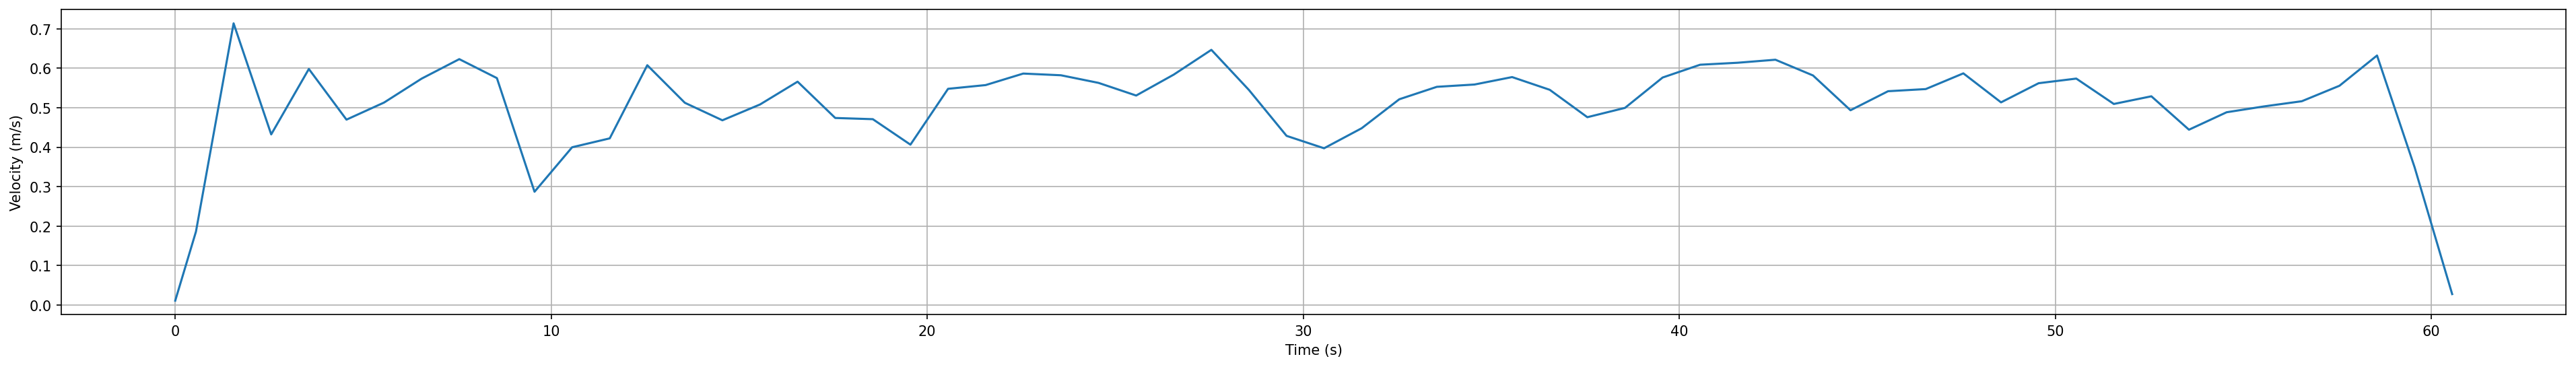

In [964]:
plt.figure(dpi=150, figsize=(32,4))
plt.grid()
# plt.xlim(39,102)
# plt.ylim(0,0.9)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# plt.plot(t_wp, waypoints_df.V_avg)
plt.plot(t_wp, v)

#### This is to check when is the car going to move 

In [965]:
df.index[(df['t'] >= 39.0) & (df['t']<=40.0)]
for i in range(390,400):
    print(df.iloc[i])

time            2022-08-16 12:40:48.961828
PosX                             -0.000591
PosY                             -0.000922
OriantationX                      0.000457
OriantationY                     -0.000211
OriantationZ                      0.000114
OriantationW                           1.0
Vmag                              0.008689
t                                 39.00457
Name: 390, dtype: object
time            2022-08-16 12:40:49.060804
PosX                              0.003715
PosY                             -0.000204
OriantationX                      0.000579
OriantationY                     -0.000326
OriantationZ                      0.000075
OriantationW                           1.0
Vmag                              0.044106
t                                39.103546
Name: 391, dtype: object
time            2022-08-16 12:40:49.160397
PosX                             -0.000206
PosY                              0.001032
OriantationX                       0.00032
Oria

In [966]:
waypoints_df.head()

,X,Y,V,T
0,0.007174,-0.001097,0.011060,0.000000
1,0.066392,-0.002846,0.186110,0.551504
2,0.559134,-0.034468,0.713720,1.552226
3,1.165180,-0.095173,0.432335,2.552425
4,1.639065,-0.109956,0.598131,3.553529


In [967]:
# waypoints_df.V = waypoints_df.V.mean()* 1.5
# waypoints_df.head()

In [968]:
# waypoints_df.Y = -1 * waypoints_df.Y

# finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V_avg]).transpose()
finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V]).transpose()
finaldf.to_csv("C:/Users/Admin/Downloads/uuTN7y7rEemnrA4AsaAhFA_bbb340f02eeb11e9a59e73356fd63643_CarlaUE4Windows/CarlaSimulator/PythonClient/Course1FinalProject/racetrack_waypoints.txt", header=False,index=False)
finaldf.head()

,X,Y,V
0,0.007174,-0.001097,0.011060
1,0.066392,-0.002846,0.186110
2,0.559134,-0.034468,0.713720
3,1.165180,-0.095173,0.432335
4,1.639065,-0.109956,0.598131


In [969]:
finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V]).transpose()
finaldf.to_csv("C:/Users/Admin/Downloads/uuTN7y7rEemnrA4AsaAhFA_bbb340f02eeb11e9a59e73356fd63643_CarlaUE4Windows/CarlaSimulator/PythonClient/Course1FinalProject/rp.csv", header=False,index=False)
finaldf.head()

,X,Y,V
0,0.007174,-0.001097,0.011060
1,0.066392,-0.002846,0.186110
2,0.559134,-0.034468,0.713720
3,1.165180,-0.095173,0.432335
4,1.639065,-0.109956,0.598131


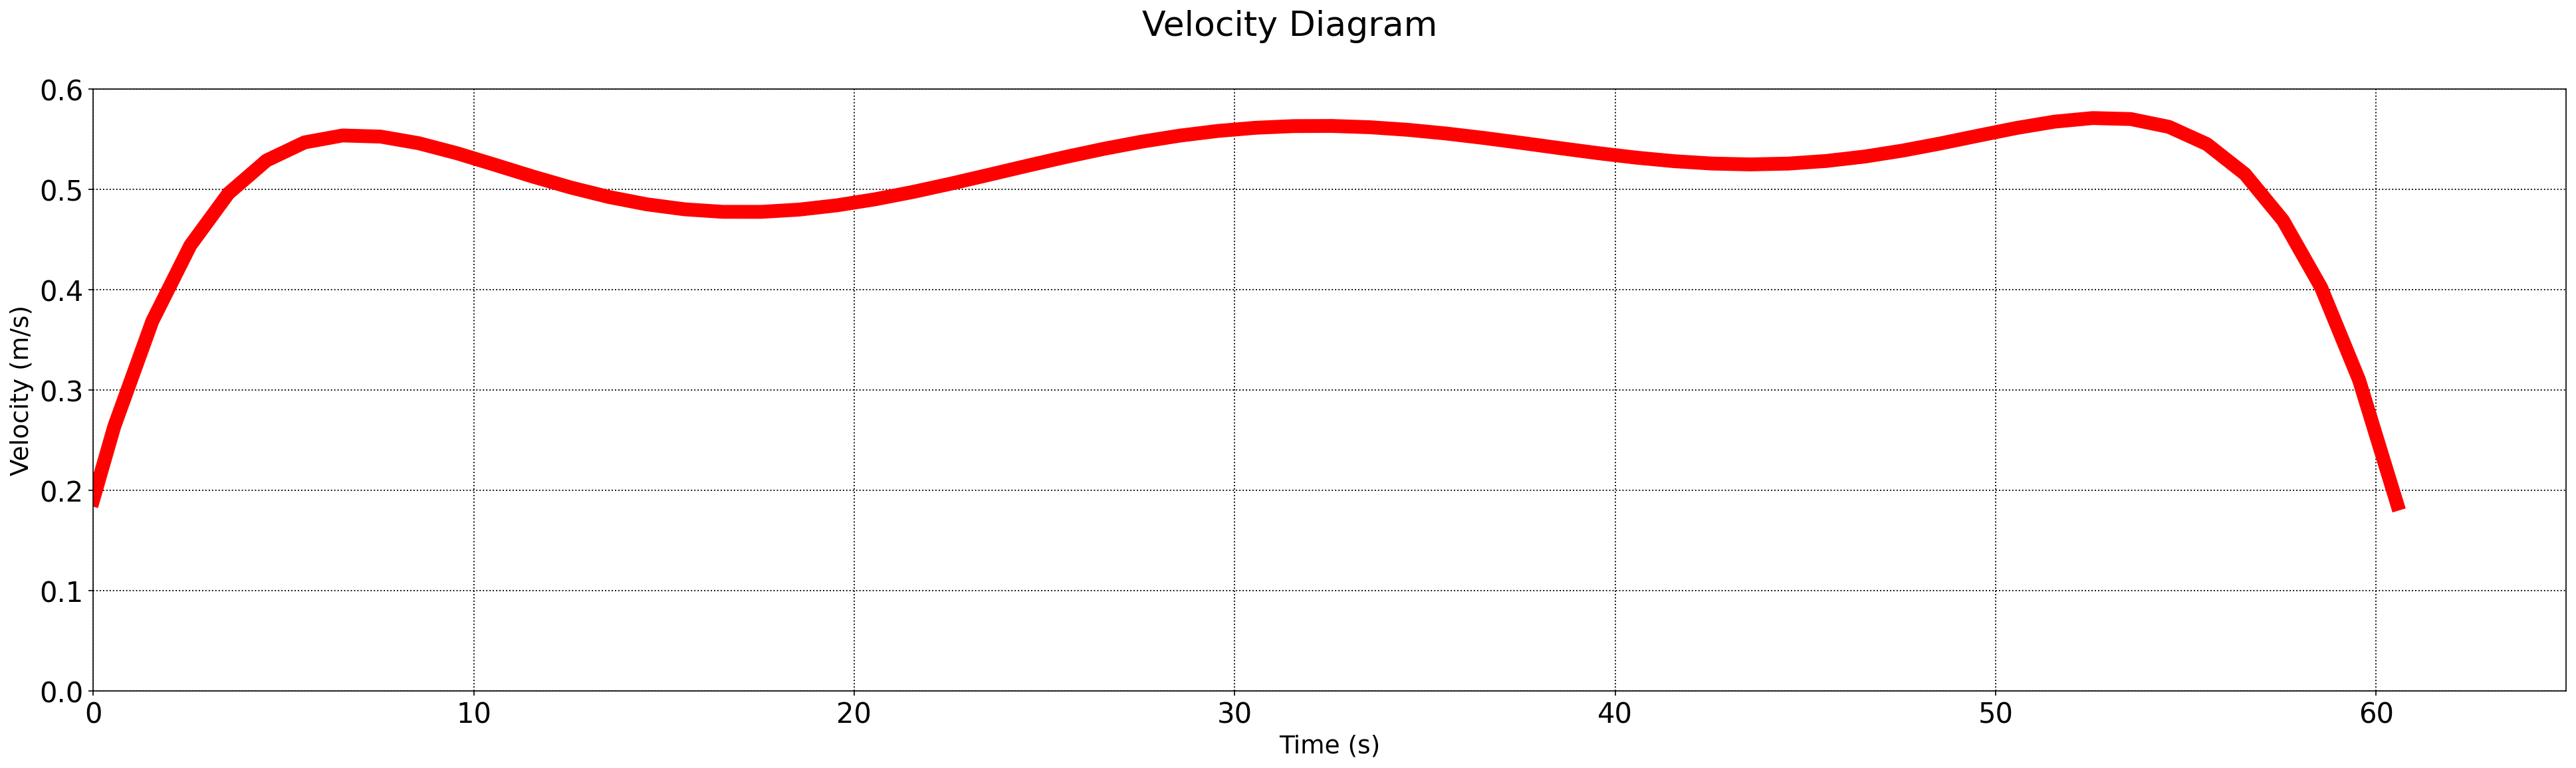

In [980]:
from turtle import color


polyV = waypoints_df.V.to_numpy()
# print(polyV)
V_polyfit = []
V_fcn = np.poly1d(np.polyfit(t_wp , polyV,6))
for i in t_wp:
    V_polyfit.append(V_fcn(i))
# print(V_fcn(t_wp[0]))
# print(V_polyfit)

plt.figure(dpi=150, figsize=(32,8))
plt.suptitle('Velocity Diagram', fontsize=25)
plt.grid(color = 'k', linestyle = ':', linewidth = 0.9)
plt.xlim(0,65)
plt.ylim(0,0.6)
plt.tick_params(axis='both', labelsize=20)

plt.xlabel('Time (s)',fontsize=18)
plt.ylabel('Velocity (m/s)',fontsize=18)

# plt.xticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
# plt.plot(t_wp, waypoints_df.V_avg)
plt.plot(t_wp, V_polyfit, color ='r',linewidth=10)

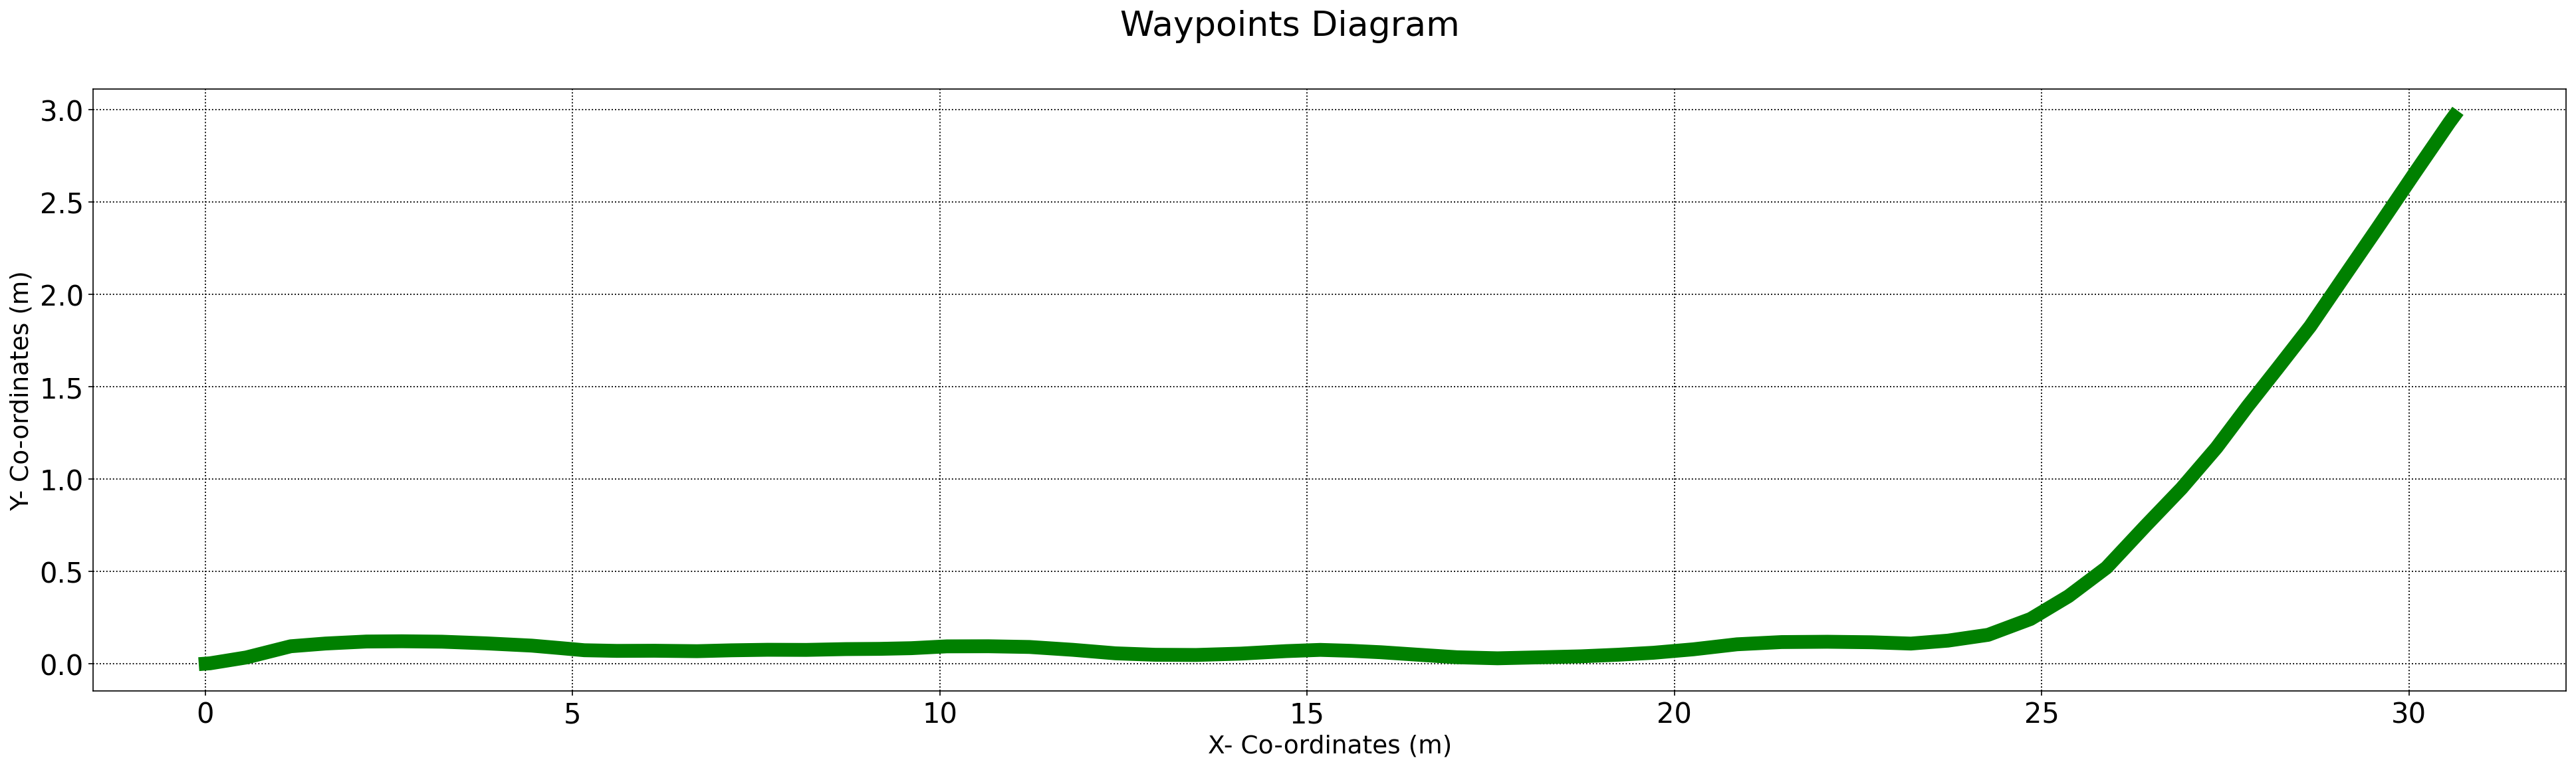

In [981]:
plt.figure(dpi=150, figsize=(32,8))
plt.suptitle('Waypoints Diagram', fontsize=25)
plt.grid(color = 'k', linestyle = ':', linewidth = 0.9)
plt.tick_params(axis='both', labelsize=20)
plt.xlabel('X- Co-ordinates (m)',fontsize=18)
plt.ylabel('Y- Co-ordinates (m)',fontsize=18)
plt.plot(finaldf.X , finaldf.Y *-1 , color= 'g', linewidth=10)

In [ ]:
waypoints_df.V =  V_polyfit
waypoints_df.V *= 1.0
finaldf = pd.DataFrame([waypoints_df.X ,waypoints_df.Y , waypoints_df.V]).transpose()
finaldf.to_csv("C:/Users/Admin/Downloads/uuTN7y7rEemnrA4AsaAhFA_bbb340f02eeb11e9a59e73356fd63643_CarlaUE4Windows/CarlaSimulator/PythonClient/Course1FinalProject/racetrack_waypoints.txt", header=False,index=False)
finaldf.head()

,X,Y,V
0,0.007174,-0.001097,0.190893
1,0.066392,-0.002846,0.263616
2,0.559134,-0.034468,0.368648
3,1.165180,-0.095173,0.444233
4,1.639065,-0.109956,0.496031


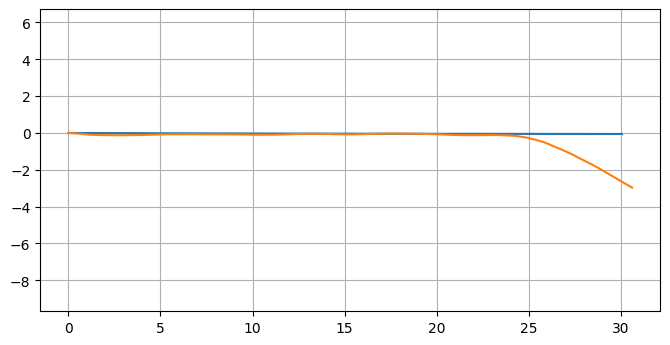

In [ ]:
df2 = pd.read_csv("C:/Users/Admin/Downloads/uuTN7y7rEemnrA4AsaAhFA_bbb340f02eeb11e9a59e73356fd63643_CarlaUE4Windows/CarlaSimulator/PythonClient/Course1FinalProject/racetrack_waypoints_or.csv")
df2.head()
df2.columns=['X_Carla','Y_Carla','V_Carla']
df2['X_Carla'] = df2['X_Carla'] - df2['X_Carla'][0]
df2['Y_Carla'] = df2['Y_Carla'] - df2['Y_Carla'][0]
plt.figure(dpi=100, figsize=(8,4))
plt.grid()
plt.axis('equal')   
plt.plot(-df2.Y_Carla[0:30] ,df2.X_Carla[0:30], waypoints_df.X , waypoints_df.Y)
